<a href="https://colab.research.google.com/github/BbangB/Code/blob/main/DNN_boston_Regression_Analysis_earlyStopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import tensorflow as tf

tf.__version__

'2.6.0'

In [3]:
tf.test.gpu_device_name()

''

In [10]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (X_test, y_test) = boston_housing.load_data()

In [11]:
print(train_data.shape)
print(X_test.shape)

print(train_targets[:10])
print(y_test[:10])

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


In [12]:
mean = train_data.mean(axis =0)
std = train_data.std(axis =0)

train_data = train_data - mean
train_data = train_data /std

X_test = X_test - mean
X_test = X_test /std

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_targets,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((323, 13), (81, 13), (323,), (81,))

In [71]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import BatchNormalization, Dropout


boston = models.Sequential(name = 'Regression')
boston.add(layers.Dense(64, activation= 'relu', input_shape=(13,)))
boston.add(BatchNormalization())
boston.add(layers.Dense(32, activation = 'relu'))
boston.add(BatchNormalization())
boston.add(layers.Dense(1))


In [72]:
boston.summary()

Model: "Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32)                128       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 3,393
Trainable params: 3,201
Non-trainable params: 192
_________________________________________________________________


In [73]:
boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

In [92]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs =500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid))

Epoch 1/500
323/323 [==============================] - 1s 3ms/step - loss: 85.3555 - mae: 6.6584 - val_loss: 3947215.7500 - val_mae: 1554.0642
Epoch 2/500
323/323 [==============================] - 1s 3ms/step - loss: 85.3279 - mae: 6.6458 - val_loss: 3257213.2500 - val_mae: 1375.4833
Epoch 3/500
323/323 [==============================] - 1s 3ms/step - loss: 85.4472 - mae: 6.6319 - val_loss: 3456821.0000 - val_mae: 1430.3469
Epoch 4/500
323/323 [==============================] - 1s 3ms/step - loss: 85.4826 - mae: 6.6313 - val_loss: 3340164.0000 - val_mae: 1393.0312
Epoch 5/500
323/323 [==============================] - 1s 3ms/step - loss: 85.3866 - mae: 6.6442 - val_loss: 3715379.2500 - val_mae: 1501.7212
Epoch 6/500
323/323 [==============================] - 1s 3ms/step - loss: 85.1833 - mae: 6.6820 - val_loss: 3226620.5000 - val_mae: 1352.4246
Epoch 7/500
323/323 [==============================] - 1s 2ms/step - loss: 85.2744 - mae: 6.6455 - val_loss: 3516330.7500 - val_mae: 1445.1555

In [93]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE is :', test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 3619575.7500 - mae: 1370.4166
MAE is : 1370.4166259765625


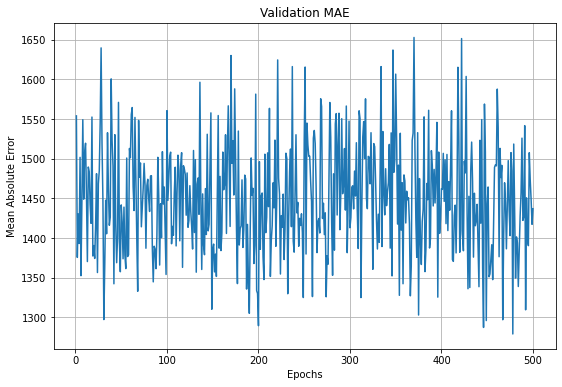

In [97]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_boston.history['val_mae']) +1)
plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_boston.history['val_mae'])
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

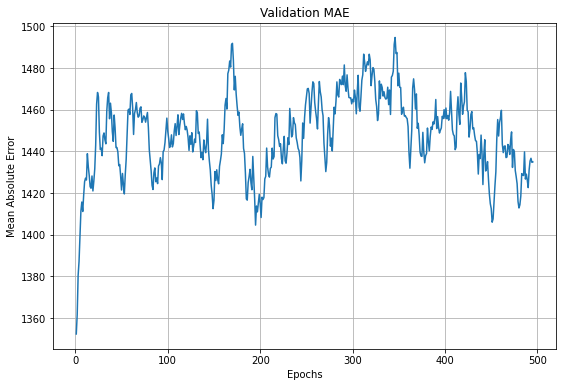

In [98]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

mae_history = Hist_boston.history['val_mae']

mae_history = smooth_curve(mae_history[5:])


plt.figure(figsize = (9,6))
plt.plot(range(1, len(mae_history) + 1), mae_history)

plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

In [99]:
from tensorflow.keras import backend as K
K.clear_session()

In [112]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import BatchNormalization, Dropout

boston = models.Sequential(name = 'EarlyStopping')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(Dropout(0.25))
boston.add(layers.Dense(1))
boston.compile(loss = 'mse',
optimizer = 'rmsprop',
metrics = ['mae'])

##Early Stopping!!!##


In [113]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_mae',
                    mode = 'min',
                    patience = 50,
                    verbose = 1)

# patience =50 => 50번이상 좋아지지 않으면 멈추겠다
#verbose = 1 =>

In [114]:
# minimum을 저장하기 위해 만듦

from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_boston.h5',
                    monitor = 'val_mae',
                    mode = 'min',
                    save_best_only = True,  ##하나만 저장되게 함
                    verbose = 1)

In [115]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                        epochs = 500,
                        batch_size = 1,
                        validation_data = (X_valid, y_valid),
                        callbacks = [es, mc],
                        verbose = 1)

Epoch 1/500
323/323 [==============================] - 1s 2ms/step - loss: 244.7891 - mae: 12.4390 - val_loss: 62.0164 - val_mae: 5.0017

Epoch 00001: val_mae improved from inf to 5.00168, saving model to best_boston.h5
Epoch 2/500
323/323 [==============================] - 1s 2ms/step - loss: 32.9412 - mae: 4.1531 - val_loss: 28.6643 - val_mae: 2.9925

Epoch 00002: val_mae improved from 5.00168 to 2.99245, saving model to best_boston.h5
Epoch 3/500
323/323 [==============================] - 1s 2ms/step - loss: 26.5677 - mae: 3.6317 - val_loss: 27.2521 - val_mae: 2.7296

Epoch 00003: val_mae improved from 2.99245 to 2.72962, saving model to best_boston.h5
Epoch 4/500
323/323 [==============================] - 1s 2ms/step - loss: 24.5049 - mae: 3.5563 - val_loss: 25.4923 - val_mae: 2.7635

Epoch 00004: val_mae did not improve from 2.72962
Epoch 5/500
323/323 [==============================] - 0s 1ms/step - loss: 24.4357 - mae: 3.5171 - val_loss: 25.9368 - val_mae: 2.7697

Epoch 00005: v

In [116]:
!ls -l

total 76
-rw-r--r-- 1 root root 71120 Aug 31 09:40 best_boston.h5
drwxr-xr-x 1 root root  4096 Aug 25 13:35 sample_data


In [117]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE is :',test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 19.0403 - mae: 2.7907
MAE is : 2.790727138519287
